In [146]:
import numpy as np
x = np.array([[1, 2, 3], [2, 4, 3]])
x

from scipy import sparse
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [147]:
sparse_matrix = sparse.csr_matrix(x)
print("SciPy sparse CSR matrix:\n{}".format(sparse_matrix))

SciPy sparse CSR matrix:
  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	2
  (1, 1)	4
  (1, 2)	3


In [148]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))
%matplotlib notebook

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


<IPython.core.display.Javascript object>


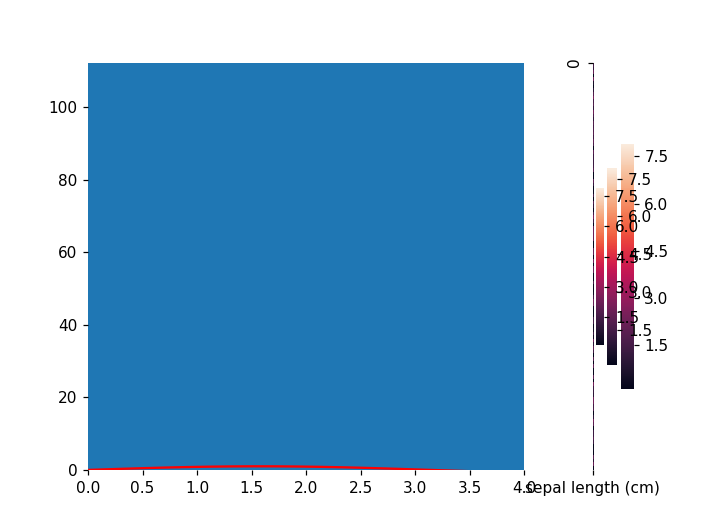

In [149]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x, y, "r-")

In [62]:
import pandas as pd

data = {'Age':[15, 30, 50, 20, 43, 43], 'Location':["New York", "Malaysia", "Purdue", "Washington", "California", "Petaling"]}
training_set = pd.DataFrame(data)
training_set

,Age,Location
0,15,New York
1,30,Malaysia
2,50,Purdue
3,20,Washington
4,43,California
5,43,Petaling


In [65]:
training_set[training_set.Age>30]

,Age,Location
2,50,Purdue
4,43,California
5,43,Petaling


In [37]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import sklearn as sk

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [18]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [22]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [27]:
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
iris_dataset['data'].shape

(150, 4)

In [34]:
iris_dataset['data'][:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [46]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
#must fix the random_state for consistency


(112, 4)

<IPython.core.display.Javascript object>


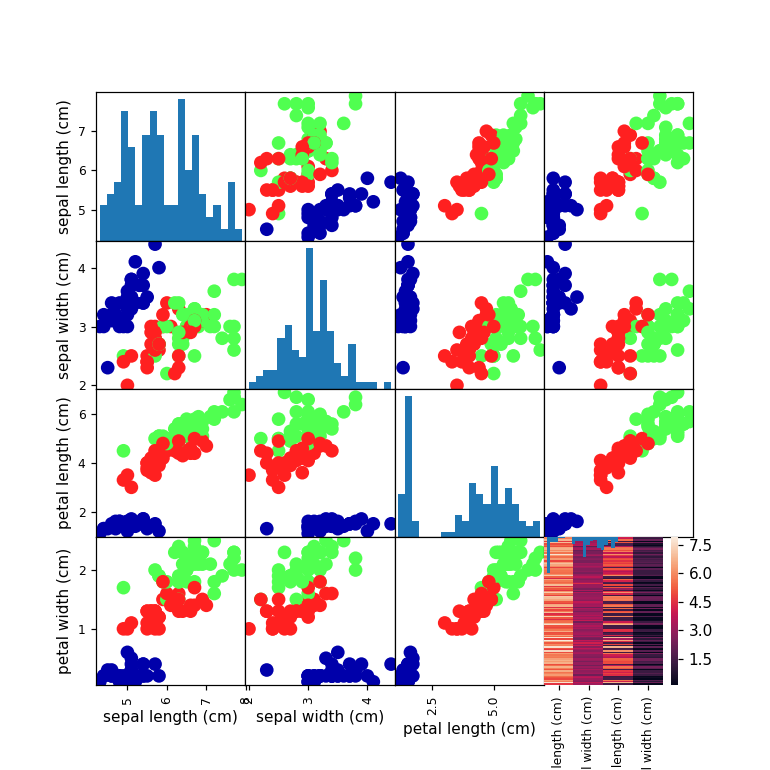

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B126B42CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B127E5F2B0>]], dtype=object)

In [103]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(7, 7),
                           marker='o', hist_kwds={'bins': 20}, s=80,
                           alpha=2, cmap=mglearn.cm3)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [131]:
new_sample = np.array([[2, 3, 3, 4]])

In [132]:
prediction = knn.predict(new_sample)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name: ['versicolor']


In [133]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [134]:
np.mean(y_pred == y_test)

0.97368421052631582

In [136]:
knn.score(X_test, y_test)

0.97368421052631582

In [172]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


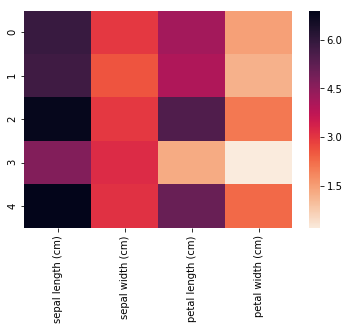

In [186]:
import seaborn as sns

%matplotlib inline

ax = sns.heatmap(iris_dataframe.iloc[:5], cmap = sns.cm.rocket_r)
ax